In [2]:
import pandas as pd
import numpy as np

In [3]:
import sklearn

In [94]:
import requests
def telegram_bot_sendtext(bot_message):
    
    bot_token = '661544421:AAHuZSMukZmFlhU-npE23CowogP375a0au4'
    bot_chatID = '-225157366'
    send_text = 'https://api.telegram.org/bot' + bot_token + '/sendMessage?chat_id=' + bot_chatID + '&parse_mode=Markdown&text=' + bot_message

    response = requests.get(send_text)

    return response.json()


In [72]:
#載入資料
origin_df = pd.read_csv("./data/train.csv", encoding='big5')

X_test = pd.read_csv("./data/test.csv", encoding='big5')

train_y = (origin_df.Y1=='Y')+0

dropped_col = ['Y1', 'CUS_ID', ]

df = origin_df.copy()
traindf = pd.get_dummies(df.drop(columns=dropped_col).fillna(0))

testdf = pd.get_dummies(X_test.drop(columns = 'CUS_ID').fillna(0))

In [73]:
traindf.shape

(100000, 294)

In [74]:
testdf.shape

(150000, 294)

In [9]:
from sklearn.model_selection import train_test_split
#x_train, x_valid, y_train, y_valid = train_test_split(traindf, train_y, test_size=0.05)
x_train, y_train = traindf, train_y

In [11]:
import xgboost as xgb

model = xgb.XGBClassifier(n_estimators=10000, tree_method='gpu_hist', slient= 0, max_depth=6)

model.fit(x_train, y_train)

In [13]:
result = model.predict(x_train)

sklearn.metrics.accuracy_score(result, y_train)

0.99999

In [54]:
result = model.predict(x_valid)

sklearn.metrics.accuracy_score(result, y_valid)

In [55]:
sklearn.metrics.accuracy_score(result, y_valid)

0.9776

In [15]:
result = model.predict(testdf)

In [25]:
unique, counts = np.unique(result, return_counts=True)
result = dict(zip(unique, counts))

In [26]:
result

{0: 149791, 1: 209}

In [27]:
unique, counts = np.unique(train_y, return_counts=True)
result = dict(zip(unique, counts))

In [28]:
result

{0: 98000, 1: 2000}

經過前面的運算，我發現儘管準確率高，模型並沒有抓出多數的1。<br>因此我要用SMOTE來讓1多一點

In [75]:
from imblearn.over_sampling import SMOTE

In [76]:
smote = SMOTE(n_jobs = 8)

In [77]:
s_x, s_y = smote.fit_resample(traindf, train_y)

In [78]:
unique, counts = np.unique(s_y, return_counts=True)
result = dict(zip(unique, counts))
print(result)

{0: 98000, 1: 98000}


In [79]:
smote_x = pd.DataFrame(s_x)
smote_x.columns = traindf.columns

In [80]:
smote_x.head()

,EDUCATION_CD,MARRIAGE_CD,L1YR_A_ISSUE_CNT,L1YR_B_ISSUE_CNT,CHANNEL_A_POL_CNT,CHANNEL_B_POL_CNT,OCCUPATION_CLASS_CD,APC_CNT,INSD_CNT,APC_1ST_YEARDIF,...,FINANCETOOLS_D_Y,FINANCETOOLS_E_0,FINANCETOOLS_E_N,FINANCETOOLS_E_Y,FINANCETOOLS_F_0,FINANCETOOLS_F_N,FINANCETOOLS_F_Y,FINANCETOOLS_G_0,FINANCETOOLS_G_N,FINANCETOOLS_G_Y
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.046512,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.046512,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.000000,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.162791,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.116279,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [81]:
testdf.head()

,EDUCATION_CD,MARRIAGE_CD,L1YR_A_ISSUE_CNT,L1YR_B_ISSUE_CNT,CHANNEL_A_POL_CNT,CHANNEL_B_POL_CNT,OCCUPATION_CLASS_CD,APC_CNT,INSD_CNT,APC_1ST_YEARDIF,...,FINANCETOOLS_D_Y,FINANCETOOLS_E_0,FINANCETOOLS_E_N,FINANCETOOLS_E_Y,FINANCETOOLS_F_0,FINANCETOOLS_F_N,FINANCETOOLS_F_Y,FINANCETOOLS_G_0,FINANCETOOLS_G_N,FINANCETOOLS_G_Y
0,2.0,0.0,4,0,4,0,1.0,0,0,0.000000,...,0,1,0,0,1,0,0,1,0,0
1,0.0,0.0,0,0,0,0,1.0,0,0,0.181818,...,0,1,0,0,1,0,0,1,0,0
2,1.0,0.0,0,0,1,0,1.0,0,0,0.068182,...,0,1,0,0,1,0,0,1,0,0
3,0.0,0.0,0,0,0,0,1.0,0,0,0.159091,...,0,1,0,0,1,0,0,1,0,0
4,1.0,0.0,0,0,1,0,1.0,0,0,0.045455,...,0,1,0,0,1,0,0,1,0,0


In [88]:
import xgboost as xgb

model = xgb.XGBClassifier(n_estimators=10000, tree_method='gpu_hist', slient= 0, max_depth=6)

model.fit(smote_x, s_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=None, n_estimators=10000,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, slient=0, subsample=1,
              tree_method='gpu_hist')

In [89]:
result = model.predict(smote_x)

In [90]:
sklearn.metrics.accuracy_score(result, s_y)

0.999938775510204

In [91]:
unique, counts = np.unique(result, return_counts=True)
count_result = dict(zip(unique, counts))
print(count_result)

{0: 98008, 1: 97992}


In [92]:
result = model.predict(testdf)

In [98]:
telegram_bot_sendtextgram_bot_sendtext("模型好囉")

NameError: name 'telegram_bot_sendtextgram_bot_sendtext' is not defined

In [93]:
unique, counts = np.unique(result, return_counts=True)
count_result = dict(zip(unique, counts))
print(count_result)

{0: 149613, 1: 387}


In [96]:
import xgboost as xgb

model = xgb.XGBRegressor(n_estimators=10000, tree_method='gpu_hist', max_depth=6)

model.fit(smote_x, s_y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=None, n_estimators=10000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=True, subsample=1, tree_method='gpu_hist')

In [97]:
result_train = model.predict(smote_x)
result_test = model.predict(testdf)

In [112]:
result_test[result_test>0.035].shape

(74421,)

In [107]:
result.shape

(150000,)

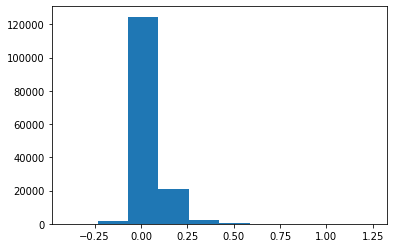

In [104]:
import matplotlib.pyplot as plt
plt.hist(result_test)
plt.show()

In [113]:
import xgboost as xgb

model = xgb.XGBRegressor(n_estimators=1000, tree_method='gpu_hist')

model.fit(smote_x, s_y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=True, subsample=1, tree_method='gpu_hist')

In [114]:
result_train = model.predict(smote_x)
result_test = model.predict(testdf)

In [118]:
result_test[result_test>0.05].shape

(74718,)

In [119]:
result.shape

(150000,)

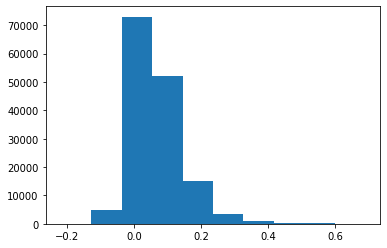

In [120]:
import matplotlib.pyplot as plt
plt.hist(result_test)
plt.show()